<a href="https://colab.research.google.com/github/hassanpournarges/models/blob/master/External_data_Local_Files%2C_Drive%2C_Sheets%2C_and_Cloud_Storage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook provides recipes for loading and saving data from external sources.

# Local file system

## Uploading files from your local file system

`files.upload` returns a dictionary of the files which were uploaded.
The dictionary is keyed by the file name and values are the data which were uploaded.

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

## Downloading files to your local file system

`files.download` will invoke a browser download of the file to your local computer.


In [0]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

# Google Drive

You can access files in Drive in a number of ways, including:
- Mounting your Google Drive in the runtime's virtual machine
- Using a wrapper around the API such as [PyDrive](https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html)
- Using the [native REST API](https://developers.google.com/drive/v3/web/about-sdk)



Examples of each are below.

## Mounting Google Drive locally

The example below shows how to mount your Google Drive on your runtime using an authorization code, and how to write and read files there. Once executed, you will be able to see the new file (`foo.txt`) at [https://drive.google.com/](https://drive.google.com/).

Note this only supports reading, writing, and moving files; to programmatically modify sharing settings or other metadata, use one of the other options below.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code
Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np

def sigmoidPerceptron(x, w, bias):
  c=np.dot(x,w)
  print('c(dot):',c)
  bias=-0.5
  product = c + bias;
  print('product:',product)
  result=tf.math.sigmoid(product)
  print('result:',result)
  if result< 0:
    print(0)
  else:
    print(1)
    
def main(): 
  x= [0.6, 0.9]
  w= [0.5, 0.9]
  bias= -0.5
  sigmoidPerceptron(x, w, bias)
  
main()  

c(dot): 1.11
product: 0.6100000000000001
result: Tensor("Sigmoid_1:0", shape=(), dtype=float64)


OperatorNotAllowedInGraphError: ignored

In [0]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

Hello Google Drive!

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

training_epochs = 500
n_neurons_in_h1 = 60
n_neurons_in_h2 = 60
learning_rate = 0.01
n_features=784
n_classes=10
tr_features=[]
X = tf.placeholder(tf.float32, [None, n_features], name='features')
Y = tf.placeholder(tf.float32, [None, n_classes], name='labels')
print(X)
W1 = tf.Variable(tf.truncated_normal([n_features, n_neurons_in_h1], mean=0, stddev=1 / np.sqrt(n_features)), name='weights1')
b1 = tf.Variable(tf.truncated_normal([n_neurons_in_h1],mean=0, stddev=1 / np.sqrt(n_features)), name='biases1')
y1 = tf.nn.tanh((tf.matmul(X, W1)+b1), name='activationLayer1')
#network parameters(weights and biases) are set and initialized(Layer2)
W2 = tf.Variable(tf.random_normal([n_neurons_in_h1, n_neurons_in_h2],mean=0,stddev=1/np.sqrt(n_features)),name='weights2')
b2 = tf.Variable(tf.random_normal([n_neurons_in_h2],mean=0,stddev=1/np.sqrt(n_features)),name='biases2')
#activation function(sigmoid)
y2 = tf.nn.sigmoid((tf.matmul(y1,W2)+b2),name='activationLayer2')
#output layer weights and biasies
Wo = tf.Variable(tf.random_normal([n_neurons_in_h2, n_classes], mean=0, stddev=1/np.sqrt(n_features)), name='weightsOut')
bo = tf.Variable(tf.random_normal([n_classes], mean=0, stddev=1/np.sqrt(n_features)), name='biasesOut')
#activation function(softmax)
a = tf.nn.softmax((tf.matmul(y2, Wo) + bo), name='activationOutputLayer')
 #cost function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(a),reduction_indices=[1]))
    #optimizer
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
    #compare predicted value from network with the expected value/target
correct_prediction = tf.equal(tf.argmax(a, 1), tf.argmax(Y, 1))
#accuracy determination
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name="Accuracy")
print('acc:',accuracy)
# initialization of all variables
initial = tf.global_variables_initializer()

#creating a session
with tf.Session() as sess:
    sess.run(initial)
    writer = tf.summary.FileWriter("/f")
    writer.add_graph(sess.graph)
    merged_summary = tf.summary.merge_all()
    
    # training loop over the number of epoches
    batchsize=128
    for epoch in range(training_epochs):
        for i in range(len(tr_features)):

            start=i
            end=i+batchsize
            x_batch=tr_features[start:end]
            y_batch=tr_labels[start:end]
            
            # feeding training data/examples
            sess.run(train_step, feed_dict={X:x_batch , Y:y_batch,keep_prob:0.5})
            i+=batchsize
        # feeding testing data to determine model accuracy
        y_pred = sess.run(tf.argmax(a, 1), feed_dict={X: ts_features,keep_prob:1.0})
        y_true = sess.run(tf.argmax(ts_labels, 1))
        summary, acc = sess.run([merged_summary, accuracy], feed_dict={X: ts_features, Y: ts_labels,keep_prob:1.0})
        # write results to summary file
        writer.add_summary(summary, epoch)
        # print accuracy for each epoch
        print('epoch',epoch, acc)
        print ('---------------')
        print(y_pred, y_true)


Tensor("features_6:0", shape=(?, 784), dtype=float32)
acc: Tensor("Accuracy_4:0", shape=(), dtype=float32)


NameError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


loss (hidden nodes: 5, iterations: 2000): 32.00
loss (hidden nodes: 10, iterations: 2000): 5.40
loss (hidden nodes: 20, iterations: 2000): 9.17
Network architecture 4-5-3, accuracy: 80.00%
Network architecture 4-10-3, accuracy: 96.67%
Network architecture 4-20-3, accuracy: 93.33%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


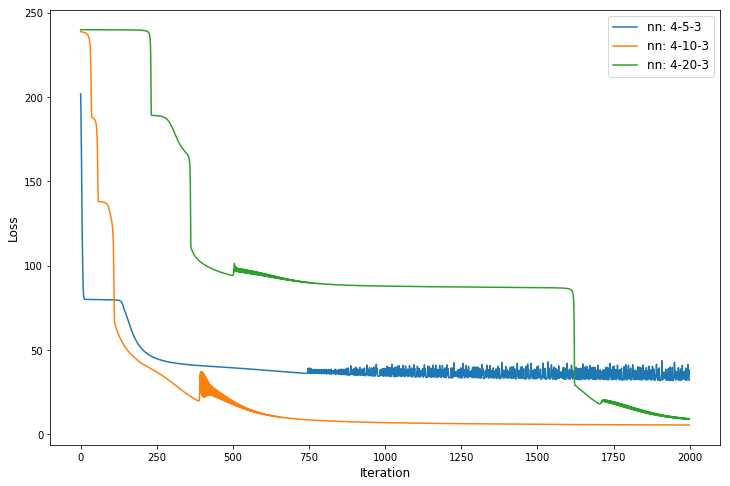

In [15]:
# Import the needed libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import urllib.request as request
import matplotlib.pyplot as plt

# Download dataset
IRIS_TRAIN_URL = "http://download.tensorflow.org/data/iris_training.csv"
IRIS_TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
train = pd.read_csv(IRIS_TRAIN_URL, names=names, skiprows=1)
test = pd.read_csv(IRIS_TEST_URL, names=names, skiprows=1)

# Train and test input data
Xtrain = train.drop("species", axis=1)
Xtest = test.drop("species", axis=1)

# Encode target values into binary ('one-hot' style) representation
ytrain = pd.get_dummies(train.species)
ytest = pd.get_dummies(test.species)
# Create and train a tensorflow model of a neural network
def create_train_model(hidden_nodes, num_iters):
    
    # Reset the graph
    tf.reset_default_graph()

    # Placeholders for input and output data
    X = tf.placeholder(shape=(120, 4), dtype=tf.float64, name='X')
    y = tf.placeholder(shape=(120, 3), dtype=tf.float64, name='y')

    # Variables for two group of weights between the three layers of the network
    W1 = tf.Variable(np.random.rand(4, hidden_nodes), dtype=tf.float64)
    W2 = tf.Variable(np.random.rand(hidden_nodes, 3), dtype=tf.float64)

    # Create the neural net graph
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Define a loss function
    deltas = tf.square(y_est - y)
    loss = tf.reduce_sum(deltas)

    # Define a train operation to minimize the loss
    optimizer = tf.train.GradientDescentOptimizer(0.005)
    train = optimizer.minimize(loss)

    # Initialize variables and run session
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    # Go through num_iters iterations
    for i in range(num_iters):
        sess.run(train, feed_dict={X: Xtrain, y: ytrain})
        loss_plot[hidden_nodes].append(sess.run(loss, feed_dict={X: Xtrain.as_matrix(), y: ytrain.as_matrix()}))
        weights1 = sess.run(W1)
        weights2 = sess.run(W2)
        
    print("loss (hidden nodes: %d, iterations: %d): %.2f" % (hidden_nodes, num_iters, loss_plot[hidden_nodes][-1]))
    sess.close()
    return weights1, weights2
num_hidden_nodes = [5, 10, 20]
loss_plot = {5: [], 10: [], 20: []}
weights1 = {5: None, 10: None, 20: None}
weights2 = {5: None, 10: None, 20: None}
num_iters = 2000

plt.figure(figsize=(12,8))
for hidden_nodes in num_hidden_nodes:
    weights1[hidden_nodes], weights2[hidden_nodes] = create_train_model(hidden_nodes, num_iters)
    plt.plot(range(num_iters), loss_plot[hidden_nodes], label="nn: 4-%d-3" % hidden_nodes)
    
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
# Evaluate models on the test set
X = tf.placeholder(shape=(30, 4), dtype=tf.float64, name='X')
y = tf.placeholder(shape=(30, 3), dtype=tf.float64, name='y')

for hidden_nodes in num_hidden_nodes:

    # Forward propagation
    W1 = tf.Variable(weights1[hidden_nodes])
    W2 = tf.Variable(weights2[hidden_nodes])
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Calculate the predicted outputs
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        y_est_np = sess.run(y_est, feed_dict={X: Xtest, y: ytest})

    # Calculate the prediction accuracy
    correct = [estimate.argmax(axis=0) == target.argmax(axis=0) 
               for estimate, target in zip(y_est_np, ytest.as_matrix())]
    accuracy = 100 * sum(correct) / len(correct)
    print('Network architecture 4-%d-3, accuracy: %.2f%%' % (hidden_nodes, accuracy))

## PyDrive

The examples below demonstrate authentication and file upload/download using PyDrive. More examples are available in the [PyDrive documentation](https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html).

In [17]:
X = tf.placeholder(shape=(30, 4), dtype=tf.float64, name='X')
y = tf.placeholder(shape=(30, 3), dtype=tf.float64, name='y')

for hidden_nodes in num_hidden_nodes:

    # Forward propagation
    W1 = tf.Variable(weights1[hidden_nodes])
    W2 = tf.Variable(weights2[hidden_nodes])
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Calculate the predicted outputs
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        y_est_np = sess.run(y_est, feed_dict={X: Xtest, y: ytest})

    # Calculate the prediction accuracy
    correct = [estimate.argmax(axis=0) == target.argmax(axis=0) 
               for estimate, target in zip(y_est_np, ytest.as_matrix())]
    accuracy = 100 * sum(correct) / len(correct)
    print('Network architecture 4-%d-3, accuracy: %.2f%%' % (hidden_nodes, accuracy))

Network architecture 4-5-3, accuracy: 80.00%
Network architecture 4-10-3, accuracy: 96.67%
Network architecture 4-20-3, accuracy: 93.33%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [35]:
import tensorflow as tf

tf.reset_default_graph()

# Define a placeholder
a = tf.placeholder("float", name='pholdA')
# Define a variable 
b = tf.Variable(2.0, name='varB')
print("b:", b)
init_op = tf.initialize_all_variables()

#run the graph
with tf.Session() as sess:
    sess.run(init_op) #execute init_op
    #print the random values that we sample
    print (sess.run(b))

# Define a constant
c = tf.constant([1., 2., 3., 4.], name='consC')
print("c:", c)
init_op = tf.initialize_all_constant()

#run the graph
with tf.Session() as sess:
    sess.run(init_op) #execute init_op
    #print the random values that we sample
    print (sess.run(c))

b: <tf.Variable 'varB:0' shape=() dtype=float32_ref>
2.0
c: Tensor("consC:0", shape=(4,), dtype=float32)


AttributeError: ignored

Authenticate and create the PyDrive client.


In [37]:
weights = tf.Variable(tf.random_normal([2,3],stddev = 0.1))
#initialize the variable
init_op = tf.initialize_all_variables()

#run the graph
with tf.Session() as sess:
    sess.run(init_op) #execute init_op
    #print the random values that we sample
    print (sess.run(weights))

[[ 0.00575317  0.0607094  -0.13015056]
 [ 0.00560785  0.05730378 -0.1730244 ]]


Create and upload a text file.


In [0]:
uploaded = drive.CreateFile({'title': 'Sample upload.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 14vDAdqp7BSCQnoougmgylBexIr2AQx2T


Load a file by ID and print its contents.


In [0]:
downloaded = drive.CreateFile({'id': uploaded.get('id')})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "Sample upload file content"


## Drive REST API

In order to use the Drive API, we must first authenticate and construct an API client.


In [0]:
from google.colab import auth
auth.authenticate_user()
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

With this client, we can use any of the functions in the [Google Drive API reference](https://developers.google.com/drive/v3/reference/). Examples follow.


### Creating a new Drive file with data from Python

First, create a local file to upload.

In [0]:
with open('/tmp/to_upload.txt', 'w') as f:
  f.write('my sample file')

print('/tmp/to_upload.txt contains:')
!cat /tmp/to_upload.txt

/tmp/to_upload.txt contains:
my sample file

Upload it using the [`files.create`](https://developers.google.com/drive/v3/reference/files/create) method. Further details on uploading files are available in the [developer documentation](https://developers.google.com/drive/v3/web/manage-uploads).

In [0]:
from googleapiclient.http import MediaFileUpload

file_metadata = {
  'name': 'Sample file',
  'mimeType': 'text/plain'
}
media = MediaFileUpload('/tmp/to_upload.txt', 
                        mimetype='text/plain',
                        resumable=True)
created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()
print('File ID: {}'.format(created.get('id')))

File ID: 1Cw9CqiyU6zbXFD9ViPZu_3yX-sYF4W17


After executing the cell above, you will see a new file named 'Sample file' at [https://drive.google.com/](https://drive.google.com/).

### Downloading data from a Drive file into Python

Download the file we uploaded above.

In [0]:
file_id = created.get('id')

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

downloaded.seek(0)
print('Downloaded file contents are: {}'.format(downloaded.read()))

Downloaded file contents are: b'my sample file'


In order to download a different file, set `file_id` above to the ID of that file, which will look like "1uBtlaggVyWshwcyP6kEI-y_W3P8D26sz".

# Google Sheets

Our examples below use the open-source [`gspread`](https://github.com/burnash/gspread) library for interacting with Google Sheets.

First, install the package using `pip`.

In [0]:
!pip install --upgrade --quiet gspread

Import the library, authenticate, and create the interface to Sheets.

In [0]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

Below is a small set of `gspread` examples. Additional examples are availabe at the [`gspread` GitHub page](https://github.com/burnash/gspread#more-examples).

## Creating a new sheet with data from Python

In [0]:
sh = gc.create('My cool spreadsheet')

After executing the cell above, you will see a new spreadsheet named 'My cool spreadsheet' at [https://sheets.google.com](https://sheets.google.com/).

Open our new sheet and add some random data.

In [0]:
worksheet = gc.open('My cool spreadsheet').sheet1

cell_list = worksheet.range('A1:C2')

import random
for cell in cell_list:
  cell.value = random.randint(1, 10)

worksheet.update_cells(cell_list)

{'spreadsheetId': '1dsQeN0YzXuM387l_CuyEbsYzL2ew9TJFzR-E-RQnwxs',
 'updatedCells': 6,
 'updatedColumns': 3,
 'updatedRange': 'Sheet1!A1:C2',
 'updatedRows': 2}

## Downloading data from a sheet into Python as a Pandas DataFrame

Read back the random data that we inserted above and convert the result into a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [0]:
worksheet = gc.open('My cool spreadsheet').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

import pandas as pd
pd.DataFrame.from_records(rows)

[['6', '3', '4'], ['7', '2', '1']]


,0,1,2
0,6,3,4
1,7,2,1


# Google Cloud Storage (GCS)

In order to use Colaboratory with GCS, you'll need to create a [Google Cloud project](https://cloud.google.com/storage/docs/projects) or use a pre-existing one.

Specify your project ID below:

In [0]:
project_id = 'Your_project_ID_here'

Files in GCS are contained in [buckets](https://cloud.google.com/storage/docs/key-terms#buckets).

Buckets must have a globally-unique name, so we generate one here.

In [0]:
import uuid
bucket_name = 'colab-sample-bucket-' + str(uuid.uuid1())

In order to access GCS, we must authenticate.

In [0]:
from google.colab import auth
auth.authenticate_user()

GCS can be accessed via the `gsutil` command-line utility or via the native Python API.

## `gsutil`

First, we configure `gsutil` to use the project we specified above by using `gcloud`.

In [0]:
!gcloud config set project {project_id}

Updated property [core/project].


Create a local file to upload.

In [0]:
with open('/tmp/to_upload.txt', 'w') as f:
  f.write('my sample file')

print('/tmp/to_upload.txt contains:')
!cat /tmp/to_upload.txt

/tmp/to_upload.txt contains:
my sample file

Make a bucket to which we'll upload the file ([documentation](https://cloud.google.com/storage/docs/gsutil/commands/mb)).

In [0]:
!gsutil mb gs://{bucket_name}

Creating gs://colab-sample-bucket-44971372-baaf-11e7-ae30-0242ac110002/...


Copy the file to our new bucket ([documentation](https://cloud.google.com/storage/docs/gsutil/commands/cp)).

In [0]:
!gsutil cp /tmp/to_upload.txt gs://{bucket_name}/

Copying file:///tmp/to_upload.txt [Content-Type=text/plain]...
/ [1 files][   14.0 B/   14.0 B]                                                
Operation completed over 1 objects/14.0 B.                                       


Dump the contents of our newly copied file to make sure everything worked ([documentation](https://cloud.google.com/storage/docs/gsutil/commands/cat)).


In [0]:
!gsutil cat gs://{bucket_name}/to_upload.txt

my sample file

In [0]:
#@markdown Once the upload has finished, the data will appear in the Cloud Console storage browser for your project:
print('https://console.cloud.google.com/storage/browser?project=' + project_id)

https://console.cloud.google.com/storage/browser?project=Your_project_ID_here


Finally, we'll download the file we just uploaded in the example above. It's as simple as reversing the order in the `gsutil cp` command.

In [0]:
!gsutil cp gs://{bucket_name}/to_upload.txt /tmp/gsutil_download.txt
  
# Print the result to make sure the transfer worked.
!cat /tmp/gsutil_download.txt

Copying gs://colab-sample-bucket483f20dc-baaf-11e7-ae30-0242ac110002/to_upload.txt...
/ [1 files][   14.0 B/   14.0 B]                                                
Operation completed over 1 objects/14.0 B.                                       
my sample file

## Python API

These snippets based on [a larger example](https://github.com/GoogleCloudPlatform/storage-file-transfer-json-python/blob/master/chunked_transfer.py) that shows additional uses of the API.

 First, we create the service client.

In [0]:
from googleapiclient.discovery import build
gcs_service = build('storage', 'v1')

Create a local file to upload.

In [0]:
with open('/tmp/to_upload.txt', 'w') as f:
  f.write('my sample file')

print('/tmp/to_upload.txt contains:')
!cat /tmp/to_upload.txt

/tmp/to_upload.txt contains:
my sample file

Create a bucket in the project specified above.

In [0]:
# Use a different globally-unique bucket name from the gsutil example above.
import uuid
bucket_name = 'colab-sample-bucket-' + str(uuid.uuid1())

body = {
  'name': bucket_name,
  # For a full list of locations, see:
  # https://cloud.google.com/storage/docs/bucket-locations
  'location': 'us',
}
gcs_service.buckets().insert(project=project_id, body=body).execute()
print('Done')

Done


Upload the file to our newly created bucket.

In [0]:
from googleapiclient.http import MediaFileUpload

media = MediaFileUpload('/tmp/to_upload.txt', 
                        mimetype='text/plain',
                        resumable=True)

request = gcs_service.objects().insert(bucket=bucket_name, 
                                       name='to_upload.txt',
                                       media_body=media)

response = None
while response is None:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, response = request.next_chunk()

print('Upload complete')

Upload complete


In [0]:
#@markdown Once the upload has finished, the data will appear in the Cloud Console storage browser for your project:
print('https://console.cloud.google.com/storage/browser?project=' + project_id)

https://console.cloud.google.com/storage/browser?project=Your_project_ID_here


Download the file we just uploaded.

In [0]:
from apiclient.http import MediaIoBaseDownload

with open('/tmp/downloaded_from_gcs.txt', 'wb') as f:
  request = gcs_service.objects().get_media(bucket=bucket_name,
                                            object='to_upload.txt')
  media = MediaIoBaseDownload(f, request)

  done = False
  while not done:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = media.next_chunk()

print('Download complete')

Download complete


Inspect the downloaded file.


In [0]:
!cat /tmp/downloaded_from_gcs.txt

my sample file